<a href="https://colab.research.google.com/github/Irenempax/Irenempax/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Path to the WESAD dataset (zipped)
zip_path = '/content/drive/MyDrive/wesad/WESAD.zip'

# List the files to confirm the path
os.listdir('/content/drive/MyDrive/wesad/')


['WESAD.zip']

In [2]:
import zipfile

# Unzip the WESAD.zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/WESAD')

# List the contents of the extracted folder
os.listdir('/content/WESAD/WESAD')


['S11',
 'S6',
 'S14',
 'S5',
 'S4',
 'S17',
 'S7',
 'S16',
 'S8',
 'S9',
 'wesad_readme.pdf',
 'S3',
 'S10',
 'S15',
 'S13',
 'S2']

In [3]:
# Path to the subject's zip file (S2 as an example)
subject_data_zip = '/content/WESAD/WESAD/S2/S2_E4_Data.zip'

# Unzip the subject's data (S2_E4_Data.zip)
with zipfile.ZipFile(subject_data_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/WESAD/S2_data')

# List the contents to confirm extraction
os.listdir('/content/WESAD/S2_data')


['EDA.csv',
 'ACC.csv',
 'BVP.csv',
 'info.txt',
 'tags.csv',
 'TEMP.csv',
 'IBI.csv',
 'HR.csv']

In [4]:
import pandas as pd

# Path to the extracted EDA file
eda_file_path = '/content/WESAD/S2_data/EDA.csv'

# Load EDA data into pandas DataFrame (assuming no header in the CSV)
eda_data = pd.read_csv(eda_file_path, header=None)

# Display the first few rows
print(eda_data.head())
print(eda_data.shape)


              0
0  1.495437e+09
1  4.000000e+00
2  0.000000e+00
3  3.280210e-01
4  4.100260e-01
(31496, 1)


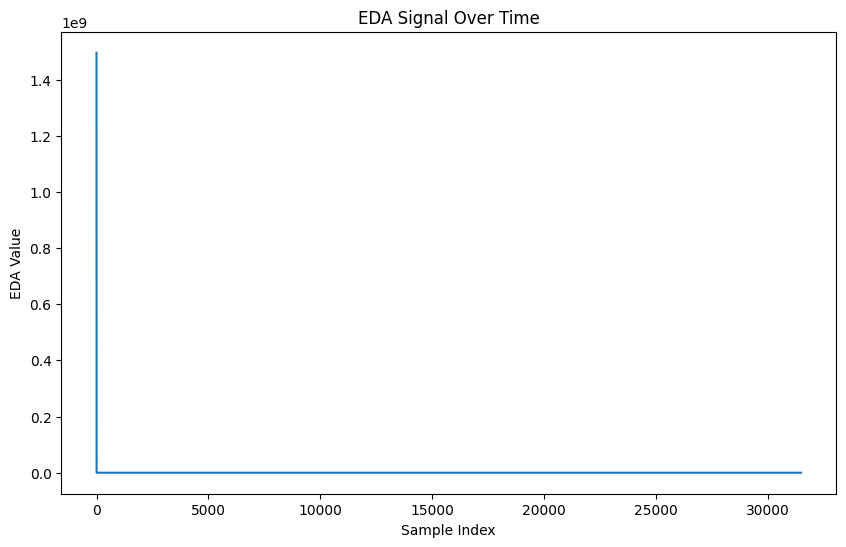

In [5]:
import matplotlib.pyplot as plt

# Plotting the EDA signal
plt.figure(figsize=(10, 6))
plt.plot(eda_data[0])  # Assuming EDA signal is in the first column
plt.title('EDA Signal Over Time')
plt.xlabel('Sample Index')
plt.ylabel('EDA Value')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Normalize the data (Optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eda_data_normalized = scaler.fit_transform(eda_data)

# Convert back to DataFrame for ease of use
eda_data_normalized = pd.DataFrame(eda_data_normalized)

# Splitting the data (assuming unsupervised learning here)
X_train_val, X_test = train_test_split(eda_data_normalized, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train_val, test_size=0.25, random_state=42)

# Display the sizes of the splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 18897
Validation set size: 6299
Testing set size: 6300


In [8]:
import numpy as np

# Generating random labels (0 or 1) for the demonstration
y_train_val = np.random.randint(2, size=len(X_train_val))
y_train, y_val = train_test_split(y_train_val, test_size=0.25, random_state=42)
y_test = np.random.randint(2, size=len(X_test))


Confusion Matrix: 
[[   0 3206]
 [   0 3093]]


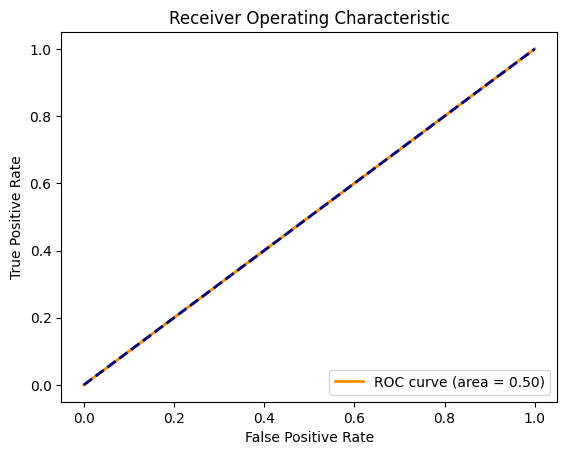

In [9]:
# Fit the model using X_train and y_train
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print(f'Confusion Matrix: \n{conf_matrix}')

# ROC Curve (if applicable)
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix: 
[[   0 3206]
 [   0 3093]]


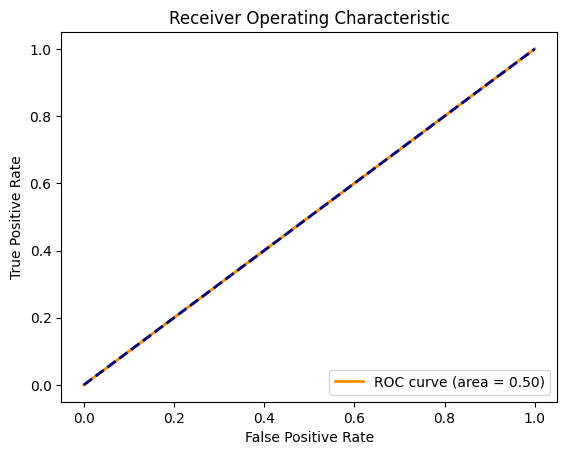

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Random Forest Classifier example
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Assuming X_train and y_train are your features and labels
model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = model.predict(X_val)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print(f'Confusion Matrix: \n{conf_matrix}')

# ROC Curve (if applicable)
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the EDA data into a pandas DataFrame (assuming it's already extracted)
# eda_data = pd.read_csv('/content/extracted_path_to_EDA.csv', header=None)

# Since your EDA data has only one column, let's assume it's a continuous variable, and create some dummy labels
X = eda_data  # Use the entire EDA column as features

# If there's no label, create dummy labels for demonstration purposes (e.g., binary classification 0 or 1)
# Here, I'll use a simple threshold to assign a binary label (0 or 1) based on EDA values
y = (X > X.mean()).astype(int)  # Assign labels based on whether the EDA value is above the mean

# Now split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Data split successfully!")


Data split successfully!


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Initialize a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [14]:
# Calculate precision, recall, and F1 score for validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

print(f'Validation Precision: {precision_val}')
print(f'Validation Recall: {recall_val}')
print(f'Validation F1 Score: {f1_val}')

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print(f'Validation Confusion Matrix:\n{conf_matrix_val}')


Validation Precision: 0.0
Validation Recall: 0.0
Validation F1 Score: 0.0
Validation Confusion Matrix:
[[6299]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

In [15]:
# Calculate precision, recall, and F1 score for test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(f'Test Confusion Matrix:\n{conf_matrix_test}')


Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0
Test Confusion Matrix:
[[6300]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

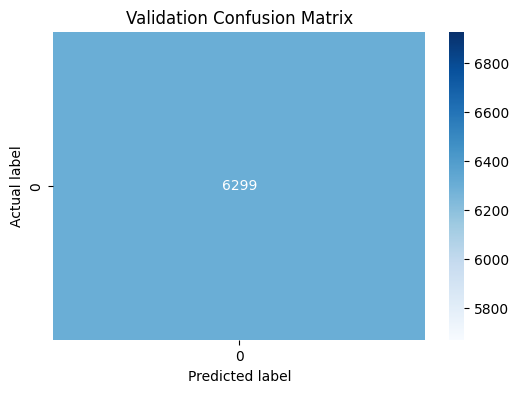

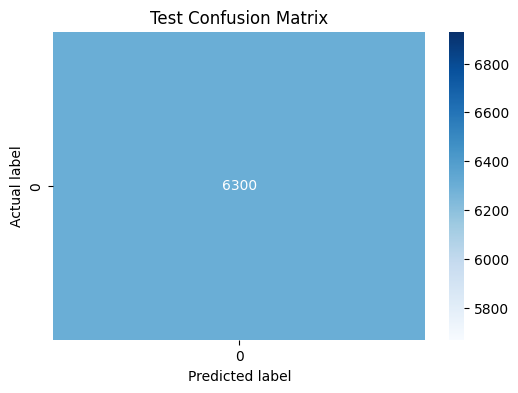

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot validation confusion matrix
plot_confusion_matrix(conf_matrix_val, 'Validation Confusion Matrix')

# Plot test confusion matrix
plot_confusion_matrix(conf_matrix_test, 'Test Confusion Matrix')


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

Tuned Model - Validation Precision: 0.0
Tuned Model - Validation Recall: 0.0
Tuned Model - Validation F1 Score: 0.0
Tuned Model - Test Precision: 0.0
Tuned Model - Test Recall: 0.0
Tuned Model - Test F1 Score: 0.0


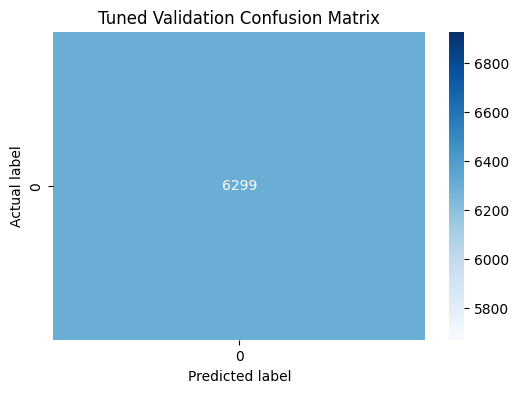

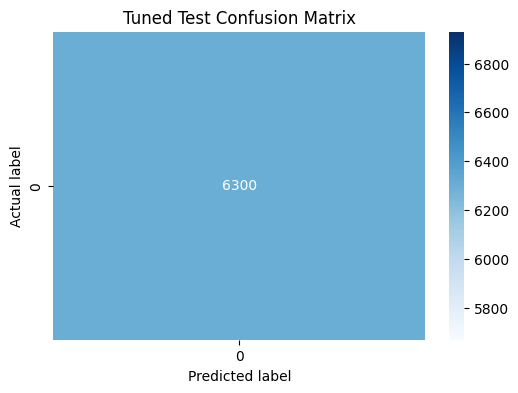

In [18]:
# Train the model with the best parameters found
best_model = grid_search.best_estimator_

# Predict on validation set
y_pred_val_tuned = best_model.predict(X_val)
y_pred_test_tuned = best_model.predict(X_test)

# Compute precision, recall, F1 score, and confusion matrix for tuned model
precision_val_tuned = precision_score(y_val, y_pred_val_tuned)
recall_val_tuned = recall_score(y_val, y_pred_val_tuned)
f1_val_tuned = f1_score(y_val, y_pred_val_tuned)

precision_test_tuned = precision_score(y_test, y_pred_test_tuned)
recall_test_tuned = recall_score(y_test, y_pred_test_tuned)
f1_test_tuned = f1_score(y_test, y_pred_test_tuned)

print(f'Tuned Model - Validation Precision: {precision_val_tuned}')
print(f'Tuned Model - Validation Recall: {recall_val_tuned}')
print(f'Tuned Model - Validation F1 Score: {f1_val_tuned}')

print(f'Tuned Model - Test Precision: {precision_test_tuned}')
print(f'Tuned Model - Test Recall: {recall_test_tuned}')
print(f'Tuned Model - Test F1 Score: {f1_test_tuned}')

# Confusion matrix for the tuned model
conf_matrix_val_tuned = confusion_matrix(y_val, y_pred_val_tuned)
conf_matrix_test_tuned = confusion_matrix(y_test, y_pred_test_tuned)

# Plot tuned confusion matrices
plot_confusion_matrix(conf_matrix_val_tuned, 'Tuned Validation Confusion Matrix')
plot_confusion_matrix(conf_matrix_test_tuned, 'Tuned Test Confusion Matrix')
